## 数据分析概括

## 整体数据探测

In [1]:
import os 
from os import walk #方法用于通过在目录树中游走输出在目录中的文件名，向上或者向下。

base_path = '../../data/'
data_path = os.path.join(base_path, 'garbage_classify/train_data')

# 数据路径
print(data_path)

for (dirpath, dirname, filename) in walk(data_path):
    print("*"*60)

    print("整个目录:",dirpath)

    print("所有数目:",len(filename))

    print("文件名例子:", filename[:5])

../../data/garbage_classify/train_data
************************************************************
整个目录: ../../data/garbage_classify/train_data
所有数目: 29604
文件名例子: ['img_1.jpg', 'img_1.txt', 'img_10.jpg', 'img_10.txt', 'img_100.jpg']


我们需要分析 *.txt 文件 然后img.txt 
首先 我们需要配置 txt文件输出


In [2]:
from glob import glob  # 用它可以查找符合自己目的的文件

def get_image_info():

    data_txt_path = os.path.join(data_path, '*.txt')
    print(data_txt_path)
    txt_file_path = glob(data_txt_path)
    # print(txt_file_path[:2])|


    ## 存储txt文件中的变量
    img_path_list = []
    img_name2label_dict = dict()
    img_label_dict = dict()
    # 读取文件中的内容
    for file_path in txt_file_path:
        print(file_path)
        with open(file_path, 'r') as f:
            line = f.readline()
        # print(line)
        line.strip()
        img_name = line.split(',')[0]
        img_label = line.split(',')[1]
        img_label = int(img_label)
        
        # 图片路径
        img_name_path = os.path.join(base_path, 'garbage_classify/train_data/{}'.format(img_name))
        img_path_list.append(
            {
                'img_name_path':img_name_path,
                'img_label':img_label
            }
        )


        # 图片的名称-标签
        img_name2label_dict[img_name] = img_label

        # 每一个标签出现的次数
        img_label_count = img_label_dict.get(img_label, 0)
        if img_label_count:
            img_label_dict[img_label] = img_label_count+1
        else:
            img_label_dict[img_label] = 1


    
    return img_path_list,img_name2label_dict,img_label_dict

img_path_list,img_name2label_dict,img_label_dict= get_image_info()
print(img_label_dict)


age_classify/train_data\img_954.txt
../../data/garbage_classify/train_data\img_9540.txt
../../data/garbage_classify/train_data\img_9541.txt
../../data/garbage_classify/train_data\img_9542.txt
../../data/garbage_classify/train_data\img_9543.txt
../../data/garbage_classify/train_data\img_9544.txt
../../data/garbage_classify/train_data\img_9545.txt
../../data/garbage_classify/train_data\img_9546.txt
../../data/garbage_classify/train_data\img_9547.txt
../../data/garbage_classify/train_data\img_9548.txt
../../data/garbage_classify/train_data\img_9549.txt
../../data/garbage_classify/train_data\img_9551.txt
../../data/garbage_classify/train_data\img_9552.txt
../../data/garbage_classify/train_data\img_9553.txt
../../data/garbage_classify/train_data\img_9555.txt
../../data/garbage_classify/train_data\img_9556.txt
../../data/garbage_classify/train_data\img_9557.txt
../../data/garbage_classify/train_data\img_9559.txt
../../data/garbage_classify/train_data\img_956.txt
../../data/garbage_classify/t

In [3]:
help(sorted)

Help on built-in function sorted in module builtins:

sorted(iterable, /, *, key=None, reverse=False)
    Return a new list containing all items from the iterable in ascending order.
    
    A custom key function can be supplied to customize the sort order, and the
    reverse flag can be set to request the result in descending order.



In [4]:
img_label_dict = dict(sorted(img_label_dict.items()))

In [5]:
import json
label_dict = dict()
json_data_path = r'D:/ai/data/garbage_classify/garbage_classify_rule.json'
with open(json_data_path, encoding='utf-8') as f:
    label_dict = json.load(f)


## 数据不同类别分布
* pyecharts

In [6]:
# 首先构造数
x = img_label_dict.keys()
y = img_label_dict.values()
print("x=",x)
print("y=",y)
# 借助python 列表推导式来修改x
x = ['{}-{}'.format(label_idx,label_dict[str(label_idx)]) for label_idx in img_label_dict.keys()]

x= dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39])
y= dict_values([242, 370, 279, 85, 387, 289, 395, 362, 380, 389, 387, 736, 331, 409, 357, 419, 352, 309, 362, 312, 226, 657, 375, 309, 318, 550, 351, 536, 382, 416, 321, 446, 280, 322, 395, 351, 265, 322, 391, 437])


In [7]:
# 通过pyecharts来进行绘制图表
from pyecharts import options as opts 
from pyecharts.charts import Bar
# 构建pyecharts需要的数据
x = list(x)
y = list(y)
# 创建pyecharts的Bar实例对象
bar = Bar(init_opts=opts.InitOpts(width='1100px', height='500px'))
# 填充数据
bar.add_xaxis(xaxis_data=x)
bar.add_yaxis(series_name='', y_axis=y)
# 设置一些全局的参数
bar.set_global_opts(
    # 给图标设置标题
    title_opts=opts.TitleOpts(title="垃圾分类 不同类别数据分布"), 
    # 使得x轴数据倾斜
    xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=20)))

# 展示我们的图表
bar.render_notebook()

C:\Users\lzn\AppData\Local\Continuum\anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


## 数据宽高比统计分析


In [8]:
from glob import glob 
import os 
from PIL import Image
from tqdm import tqdm
base_path = r'../../data/'
data_path = os.path.join(base_path, 'garbage_classify/train_data')
print(data_path)
data_path_jpg = os.path.join(data_path, '*.jpg')
print(data_path_jpg)

data_list = []

data_path_list = glob(data_path_jpg)
# print(data_path_list[:3]
print("*"*60)

for file_path in tqdm(data_path_list):
    # print(file_path)
    img = Image.open(file_path)
    width = img.size[0]
    height = img.size[1]

    ratio = float("{:.2f}".format(width/height))

    img_name = file_path.split('\\')[-1]
    img_id = img_name.split('.')[0].split('_')[-1]
    img_label = img_name2label_dict.get(img_name, 0)
    data_list.append([int(img_id), width, height , ratio , int(img_label)])
    
data_list[:3]

../../data/garbage_classify/train_data
../../data/garbage_classify/train_data\*.jpg
100%|██████████| 14802/14802 [00:01<00:00, 10961.29it/s]


[[1, 800, 575, 1.39, 0], [10, 750, 690, 1.09, 0], [100, 688, 357, 1.93, 0]]

In [9]:
ratio_list = [ratio[3] for ratio in data_list]
print(ratio_list[:34])

[1.39, 1.09, 1.93, 0.99, 1.11, 0.75, 1.33, 1.69, 0.89, 1.21, 1.17, 1.5, 1.9, 0.56, 1.33, 0.56, 0.75, 1.0, 0.75, 1.33, 1.28, 1.69, 0.74, 1.33, 1.33, 1.6, 1.48, 0.91, 1.53, 1.33, 0.86, 1.2, 1.05, 1.39]


# 首先分析单变量的数据分析，用直方图来完成
# python seaborn 可视化工具库来进行展示


In [10]:
# 导入可视化库
import seaborn as sns
# 导入计算相关库
import numpy as np 

sns.set()
np.random.seed(0)

# seaborn 直方图
ax = sns.distplot(ratio_list)

C:\Users\lzn\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\colors.py:53: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sized
C:\Users\lzn\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\lzn\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\lzn\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2349: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(obj, collections.Iterator):
C:\Users\lzn\App

接下来 获取(0,2)数据， 然后查看下效果

In [11]:
# 需要过滤数据
help(filter)

Help on class filter in module builtins:

class filter(object)
 |  filter(function or None, iterable) --> filter object
 |  
 |  Return an iterator yielding those items of iterable for which function(item)
 |  is true. If function is None, return the items that are true.
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.



In [12]:
ratio_list = filter(lambda x:x>0.5 and x<=2,ratio_list)

C:\Users\lzn\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
14192


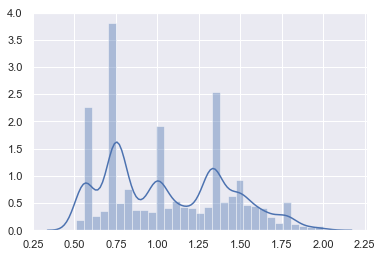

In [13]:
ratio_list = list(ratio_list)

print(len(ratio_list))

# 导入可视化库
import seaborn as sns
# 导入计算相关库
import numpy as np 

sns.set()
np.random.seed(0)

# seaborn 直方图
ax = sns.distplot(ratio_list)

从上面内容，我们可以知道整体数据分布在（0.5，1.5)

# 如何切分数据集 - 训练集和验证集

In [14]:
# 原始数据
img_path_list[:2]

[{'img_name_path': '../../data/garbage_classify/train_data/img_1.jpg',
  'img_label': 0},
 {'img_name_path': '../../data/garbage_classify/train_data/img_10.jpg',
  'img_label': 0}]

In [15]:
# 原始数据大小
len(img_path_list)

14802

In [17]:
# 原始数据进行shuffle
import random
random.shuffle(img_path_list)

# 数据分布 0.8-0.2
img_count = len(img_path_list)
train_size = int(img_count*0.8)
print("img_size:",img_count)
print("train_size:",train_size)

train_img_list = img_path_list[:train_size]
val_img_list = img_path_list[train_size:]

print("训练集数目:", len(train_img_list))
print("验证数目:", len(val_img_list))

img_size: 14802
train_size: 11841
训练集数目: 11841
验证数目: 2961


## 数据切分后，我们就可以生成训练和验证数据

[python文件操作](https://www.cnblogs.com/hushaojun/p/4533241.html)

In [19]:
# 创建文件夹
base_path = '../../data/'
train_path = os.path.join(base_path, 'gc-for-pytorch')
if os.path.exists(train_path):
    print("已经存在目录")
else:
    os.mkdir(train_path)



In [23]:
def mkdirFun(dir_path):
    if os.path.exists(dir_path):
        pass
    else:
        os.mkdir(dir_path)

In [29]:
# 训练数据的生成
import shutil
with open(os.path.join(base_path, 'gc-for-pytorch/train.txt'), 'w') as f:
    for img_dict in train_img_list:
        # 文本格式数据
        img_name_path = img_dict['img_name_path']
        img_label = img_dict['img_label']
        f.write("{}\t{}\n".format(img_name_path, img_label))


        # 图片-标签目录
        garbage_classfiy_dir = os.path.join(base_path, 'gc-for-pytorch/train/{}'.format(img_label))


        # 目录创建
        if not os.path.exists(garbage_classfiy_dir):
            os.makedirs(garbage_classfiy_dir)
        
        # 图片数据进行拷贝
        shutil.copy(img_name_path, garbage_classfiy_dir )

# 训练数据的生成
with open(os.path.join(base_path, 'gc-for-pytorch/val.txt'), 'w') as f:
    for img_dict in val_img_list:
        # 文本格式数据
        img_name_path = img_dict['img_name_path']
        img_label = img_dict['img_label']
        f.write("{}\t{}\n".format(img_name_path, img_label))

        garbage_classfiy_dir = os.path.join(base_path, 'gc-for-pytorch/val/{}'.format(img_label)                                            )
        if not os.path.exists(garbage_classfiy_dir):
            os.makedirs(garbage_classfiy_dir)
        
        shutil.copy(img_name_path, garbage_classfiy_dir)

## 训练集和验证集的 数据分布可视化 

## 目的是统计训练和验证数量 ，然后通过统计图表的方式在一张图展示

In [44]:
import codecs
# 获取数据内容
train_path = os.path.join(base_path, 'gc-for-pytorch/train.txt')
val_path = os.path.join(base_path, 'gc-for-pytorch/val.txt')
print("train_path:", train_path)
print("val_path:", val_path)
# 统计label count
def get_label_idx_list(data_path):
    label_idx_list = []
    for line in codecs.open(data_path, 'r'):
        line = line.strip()
        label_idx = line.split('\t')[1]
        label_idx_list.append(int(label_idx))
    return label_idx_list
# 可视化操作
from collections import Counter
train_dict = dict(Counter(get_label_idx_list(train_path)))
train_dict = dict(sorted(train_dict.items()))
val_dict = dict(Counter(get_label_idx_list(val_path)))
val_dict = dict(sorted(val_dict.items()))
print("train_dict:", train_dict)
print("val_dict:", val_dict)

train_path: ../../data/gc-for-pytorch/train.txt
val_path: ../../data/gc-for-pytorch/val.txt
train_dict: {0: 199, 1: 292, 2: 231, 3: 70, 4: 297, 5: 231, 6: 321, 7: 294, 8: 303, 9: 310, 10: 310, 11: 573, 12: 265, 13: 325, 14: 295, 15: 335, 16: 289, 17: 255, 18: 285, 19: 242, 20: 179, 21: 516, 22: 307, 23: 242, 24: 256, 25: 436, 26: 286, 27: 453, 28: 307, 29: 329, 30: 270, 31: 350, 32: 209, 33: 259, 34: 308, 35: 294, 36: 202, 37: 246, 38: 316, 39: 354}
val_dict: {0: 43, 1: 78, 2: 48, 3: 15, 4: 90, 5: 58, 6: 74, 7: 68, 8: 77, 9: 79, 10: 77, 11: 163, 12: 66, 13: 84, 14: 62, 15: 84, 16: 63, 17: 54, 18: 77, 19: 70, 20: 47, 21: 141, 22: 68, 23: 67, 24: 62, 25: 114, 26: 65, 27: 83, 28: 75, 29: 87, 30: 51, 31: 96, 32: 71, 33: 63, 34: 87, 35: 57, 36: 63, 37: 76, 38: 75, 39: 83}
ipykernel_launcher:10: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../data/gc-for-pytorch/train.txt' mode='r' encoding='cp936'>
ipykernel_launcher:10: ResourceWarning: unclosed file <_io.TextIOWrapper name='

In [60]:
# 可视化操作
from pyecharts import options as opts
from pyecharts.charts import Bar
# 构建数据
## check train == val keys
assert train_dict.keys() == val_dict.keys()
x = list(train_dict.keys())
x = ['{}-{}'.format(label_idx,label_dict[str(label_idx)]) for label_idx in img_label_dict.keys()]
## train
train_y = list(train_dict.values())
val_y = list(val_dict.values())
# 创建Bar实例
bar = Bar(init_opts=opts.InitOpts(width='800px', height='500px'))
bar.add_xaxis(xaxis_data=x)
bar.add_yaxis(series_name='train', y_axis=train_y)
bar.add_yaxis(series_name='val', y_axis=val_y)
# 设置全局参数
bar.set_global_opts(
    title_opts=opts.TitleOpts(title='垃圾分类 Train/Val 不同类别数据分布'),
    xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=20))
    )

# 展示图标
bar.render_notebook()

C:\Users\lzn\AppData\Local\Continuum\anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


In [51]:
help(bar)

Help on Bar in module pyecharts.charts.basic_charts.bar object:

class Bar(pyecharts.charts.chart.RectChart)
 |  Bar(init_opts: Union[pyecharts.options.global_options.InitOpts, dict] = <pyecharts.options.global_options.InitOpts object at 0x0000028EBFC73A88>)
 |  
 |  <<< Bar Chart >>>
 |  
 |  Bar chart presents categorical data with rectangular bars
 |  with heights or lengths proportional to the values that they represent.
 |  
 |  Method resolution order:
 |      Bar
 |      pyecharts.charts.chart.RectChart
 |      pyecharts.charts.chart.Chart
 |      pyecharts.charts.base.Base
 |      pyecharts.charts.mixins.ChartMixin
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  add_yaxis(self, series_name: str, y_axis: Sequence[Union[int, float, pyecharts.options.charts_options.BarItem, dict]], *, is_selected: bool = True, xaxis_index: Union[int, float, NoneType] = None, yaxis_index: Union[int, float, NoneType] = None, is_legend_hover_link: bool = True, color: Union[str, NoneTy